In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
import os

In [5]:
df = pd.read_csv('Imputed Trucks Data.csv',index_col=0)

In [7]:
df.head()

,class,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,0.0,76698.0,2.041805,2.130706e+09,280.000000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,0.950388,0.000000e+00,2323.890753,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,0.731131,2.280000e+02,100.000000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.000000,7.000000e+01,66.000000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,-0.086419,1.368000e+03,458.000000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


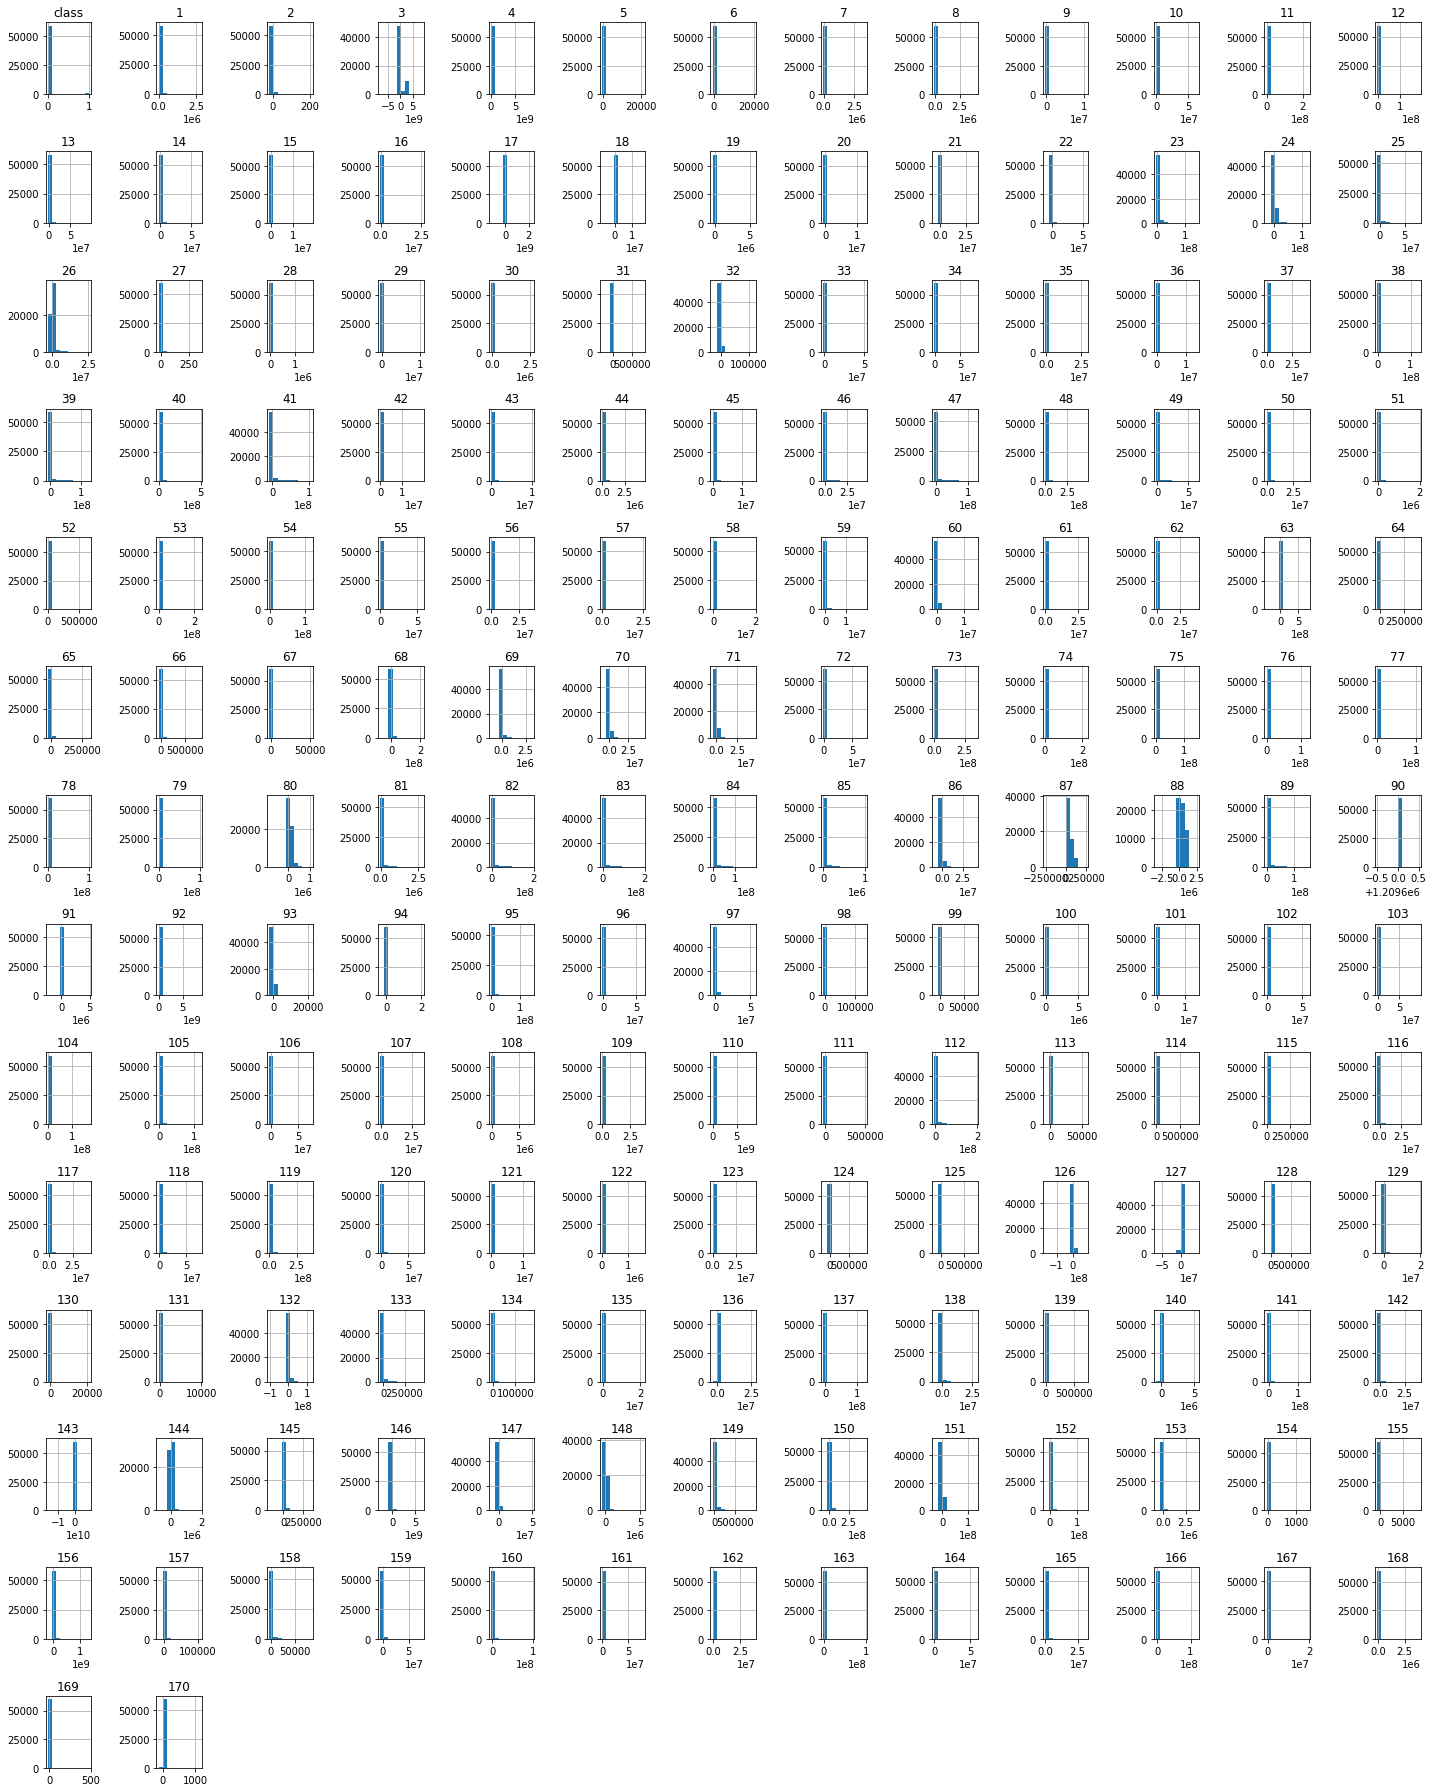

In [19]:
df.hist(figsize=(20,25))
plt.tight_layout();

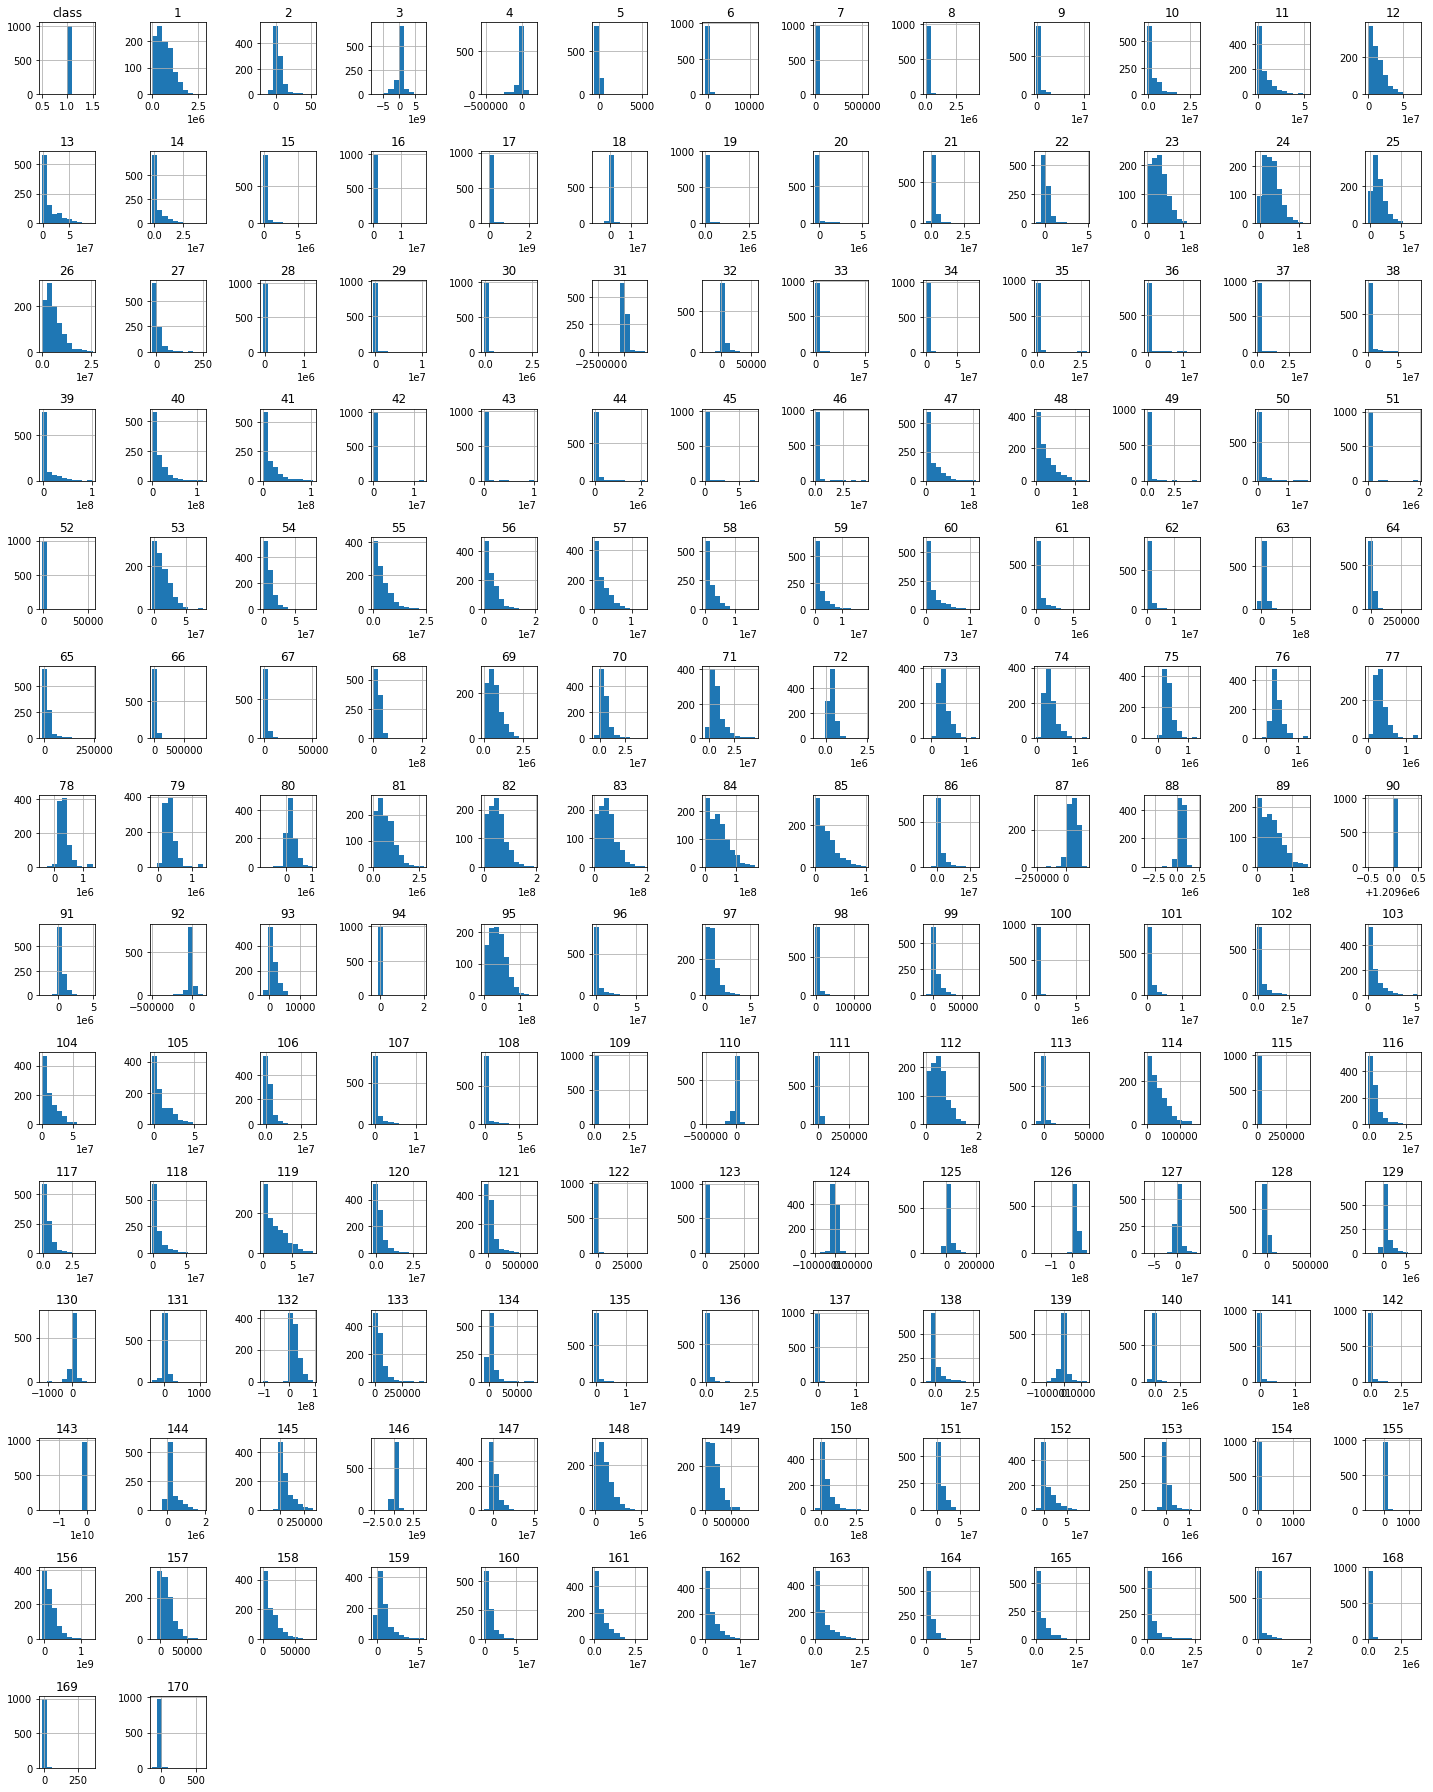

In [21]:
df[df['class']==1].hist(figsize=(20,25))
plt.tight_layout();

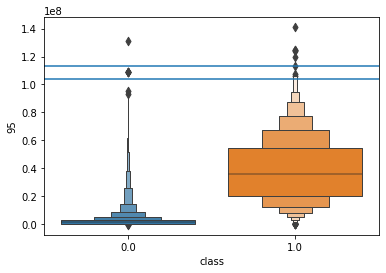

In [38]:
sns.boxenplot(x='class',y='95',data=df)
plt.axhline(df['95'].quantile(0.9999))
plt.axhline(df[df['class']==1]['95'].quantile(0.99));

In [26]:
df['95'].quantile(0.5)

1857537.12

In [42]:
scaler = StandardScaler()
scaleddf = scaler.fit_transform(df)

In [48]:
scaleddf = pd.DataFrame(scaleddf)
scaleddf.columns = df.columns

In [55]:
scaleddf['class'] = df['class']

<AxesSubplot:>

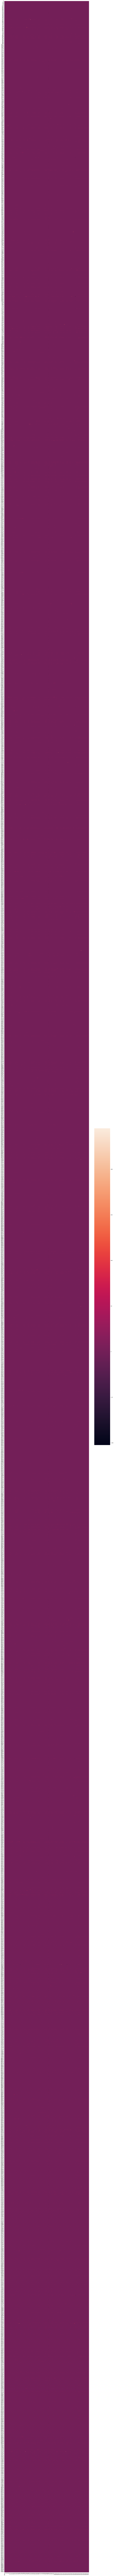

In [89]:
plt.figure(figsize=(20,500))
sns.heatmap(scaleddf)

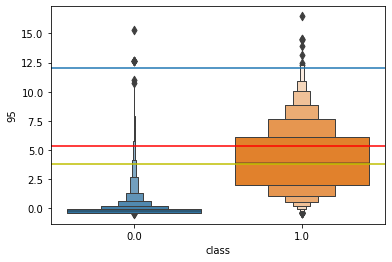

In [85]:
sns.boxenplot(x='class',y='95',data=scaleddf)
plt.axhline(scaleddf['95'].quantile(0.99),c='r')
plt.axhline(scaleddf[scaleddf['class']==1]['95'].quantile(0.99))
plt.axhline(scaleddf[scaleddf['class']==0]['95'].quantile(0.99),c='y');

In [60]:
scaleddf.nunique().sort_values()

90           1
class        2
28         650
30         685
123        722
         ...  
76       52171
77       52708
78       52998
79       53017
84       56104
Length: 171, dtype: int64

In [62]:
scaleddf.drop('90',axis=1,inplace=True)

In [74]:
X = scaleddf.loc[:,'1':]
y = scaleddf[['class']]

In [76]:
over = SMOTE(random_state=42,sampling_strategy=0.3)
under = RandomUnderSampler(random_state=42,sampling_strategy=0.5)
X_res, y_res = over.fit_resample(X, y)
X_res, y_res = under.fit_resample(X_res, y_res)

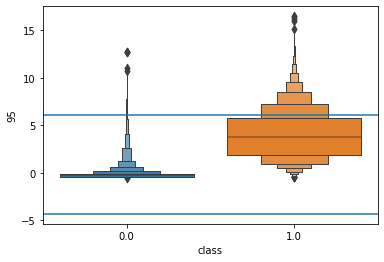

In [88]:
sns.boxenplot(x=y_res['class'],y=X_res['95'])
#plt.axhline(X_res['95'].quantile(0.995));
Q1 = X_res['95'].quantile(0.25)
Q3 = X_res['95'].quantile(0.75)
IQR = Q3 - Q1
plt.axhline(Q1 - 1.5 * IQR)
plt.axhline(Q3 + 1.5 * IQR)
#plt.axhline(scaleddf[scaleddf['class']==1]['95'].quantile(0.99));

In [94]:
X_res.to_numpy()

array([[-0.17811116,  0.16407405, -0.44187867, ...,  0.02356028,
        -0.01811485, -0.01203573],
       [-0.40550758,  0.14676561, -0.44187867, ..., -0.17691695,
        -0.01811485, -0.01203573],
       [-0.1279973 ,  0.26116282, -0.44187867, ..., -0.17691695,
        -0.01811485, -0.01203573],
       ...,
       [ 3.78861144,  3.06174498, -3.57032281, ..., -0.17594019,
         1.19401265,  0.23036825],
       [ 1.51349497,  1.0205611 , -0.44187752, ..., -0.17552304,
        -0.01811485,  0.14651017],
       [ 5.11199064,  0.62308346, -0.44187629, ..., -0.1721606 ,
        -0.01811485, -0.01203573]])

In [104]:
dist = euclidean_distances(X_res, [[0]*X_res.shape[1]])

In [152]:
joindist = X_res.join(y_res)
joindist['dist'] = dist

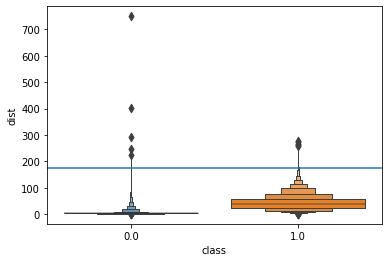

In [153]:
sns.boxenplot(data=joindist,x='class',y='dist')
plt.axhline(joindist['dist'].quantile(0.999));

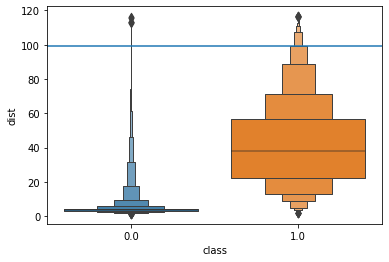

In [154]:
noout = joindist[(joindist['dist'] < joindist['dist'].quantile(0.99))]
sns.boxenplot(data=noout,x='class',y='dist')
plt.axhline(noout['dist'].quantile(0.99));

<AxesSubplot:xlabel='class', ylabel='95'>

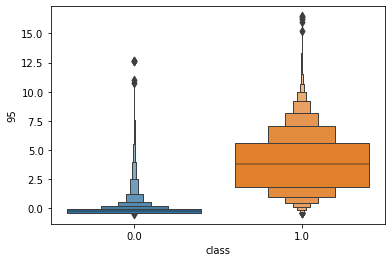

In [155]:
sns.boxenplot(data=noout,x='class',y='95')
#plt.axhline(X_res['95'].quantile(0.995));

In [156]:
noout.shape

(52569, 171)

In [151]:
noout['class'].value_counts()

0.0    35370
1.0    17199
Name: class, dtype: int64

In [79]:
y_res.value_counts() #before

class
0.0      35400
1.0      17700
dtype: int64

In [158]:
noout.head(1)

,1,2,3,4,5,6,7,8,9,10,...,163,164,165,166,167,168,169,170,class,dist
0,-0.178111,0.164074,-0.441879,-0.004014,-0.046869,-0.060393,-0.010706,-0.028195,-0.056679,-0.115738,...,-0.192402,-0.149006,-0.02226,-0.111663,0.081671,0.02356,-0.018115,-0.012036,0.0,4.549689


In [159]:
noout.drop('dist',axis=1,inplace=True)

c:\users\hari\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [161]:
X = noout.drop('class',axis=1)
y = noout[['class']]

In [162]:
X.shape

(52569, 169)

In [163]:
y.shape

(52569, 1)

In [184]:
pca = PCA()
pca.fit(X)

PCA()

In [189]:
pcarelations = pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-{}'.format(i) for i in range(1,pca.n_components_+1)])

In [193]:
round(pcarelations.head(),3)

,1,2,3,4,5,6,7,8,9,10,...,161,162,163,164,165,166,167,168,169,170
PC-1,0.126,0.054,-0.007,-0.0,0.003,0.006,0.001,0.026,0.065,0.099,...,0.127,0.126,0.122,0.131,0.114,0.046,0.074,0.035,-0.001,-0.011
PC-2,0.010,0.038,-0.033,0.0,0.015,0.014,0.005,0.092,0.181,0.236,...,-0.096,-0.113,-0.100,0.037,0.069,0.034,-0.150,-0.086,0.006,0.000
PC-3,-0.033,-0.014,-0.019,-0.0,0.001,0.001,0.000,0.004,0.010,0.016,...,0.033,0.034,0.005,-0.099,-0.082,-0.029,-0.152,-0.090,0.001,0.002
PC-4,0.086,-0.064,-0.016,0.0,-0.005,-0.007,-0.008,-0.122,-0.187,-0.182,...,-0.047,-0.078,-0.089,-0.131,-0.155,-0.047,-0.026,-0.007,-0.014,-0.009
PC-5,-0.126,0.091,-0.006,0.0,-0.008,-0.007,-0.006,-0.056,-0.000,0.066,...,0.051,-0.013,-0.031,-0.015,-0.060,-0.060,-0.076,-0.048,-0.001,-0.028


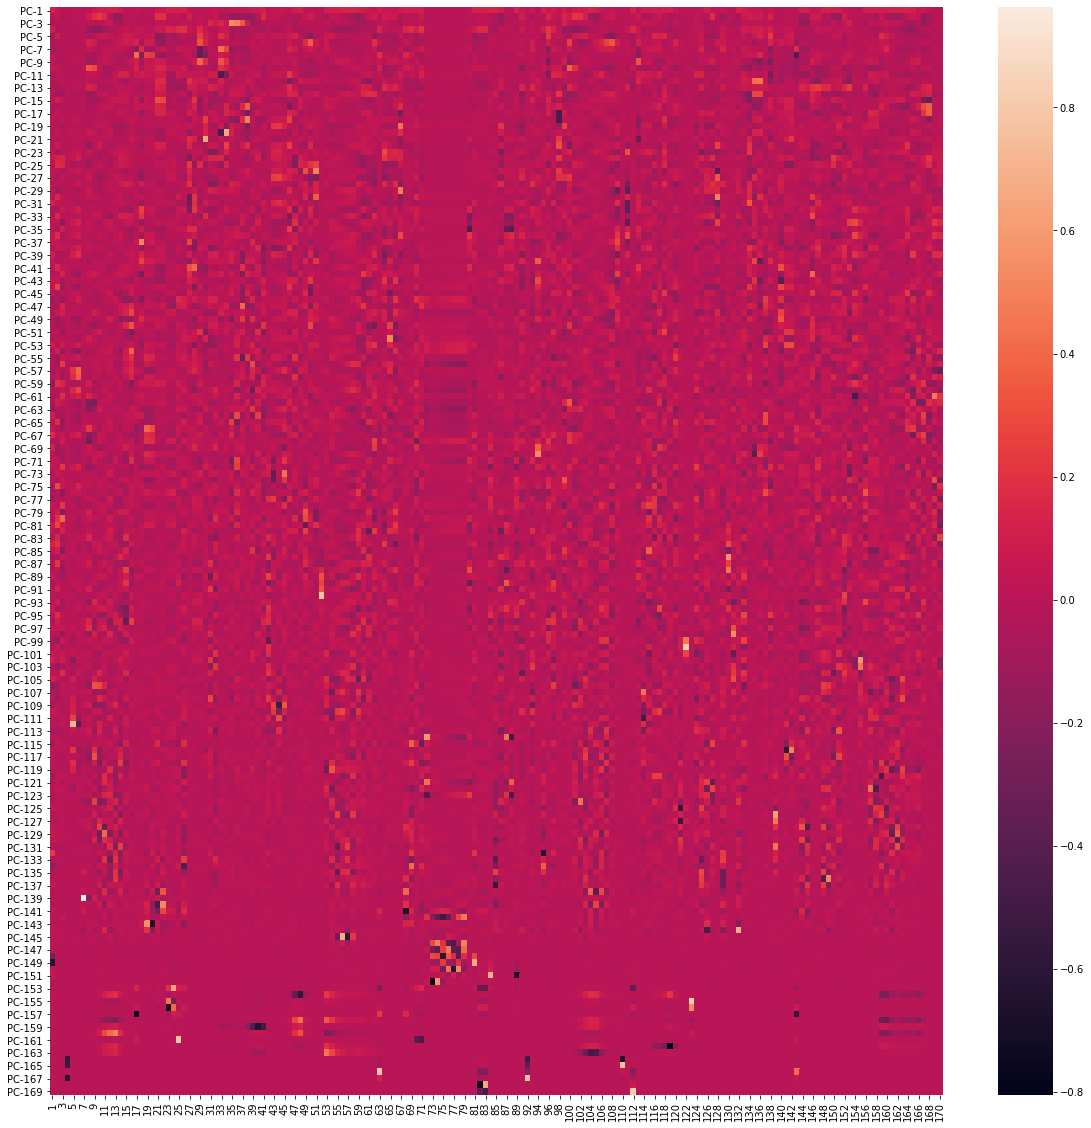

In [197]:
plt.figure(figsize=(20,20))
sns.heatmap(pcarelations);

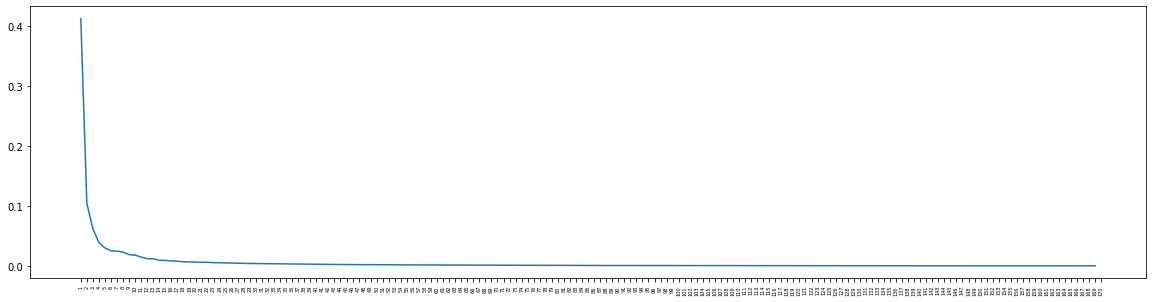

In [171]:
plt.figure(figsize=(20,5))
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(0,170),range(1,171),rotation=90,fontsize=5);

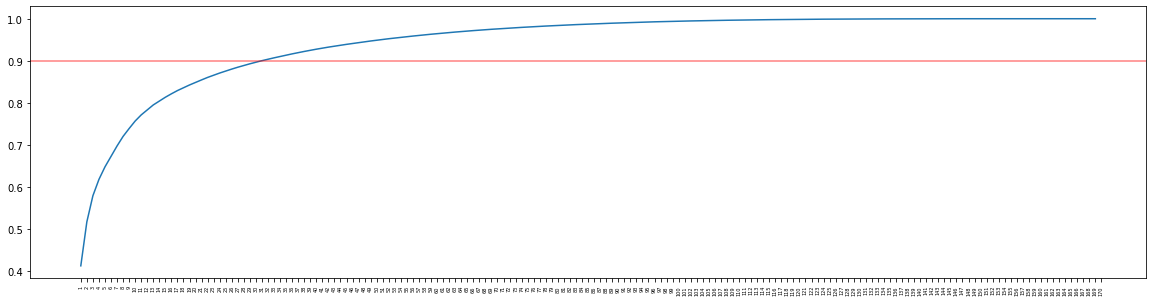

In [175]:
plt.figure(figsize=(20,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,170),range(1,171),rotation=90,fontsize=5)
plt.axhline(0.9,c='r',alpha=0.5);

In [177]:
pca = PCA(n_components = 0.99)
pca.fit(X)
pca.n_components_

91

In [178]:
pca = PCA(n_components = 0.95)
pca.fit(X)
pca.n_components_

51

In [179]:
pca = PCA(n_components = 0.90)
pca.fit(X)
pca.n_components_

31

In [180]:
pca = PCA(n_components = 0.99)
Xpca = pca.fit_transform(X)

In [198]:
Xpca = pd.DataFrame(Xpca)
Xpca.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,-9.793021,-0.981400,-0.321300,-0.692439,0.373201,-0.394560,-0.014359,-0.249347,-0.137632,0.127941,...,0.365490,-0.152955,-0.164899,-0.007001,0.093021,-0.187789,-0.310828,-0.139426,0.225016,-0.148082
1,-11.652968,-0.492764,0.122938,-0.864509,0.600114,-0.395521,-0.010793,-0.063041,-0.120611,0.228494,...,0.290690,-0.117243,-0.279709,-0.173052,-0.013370,-0.093392,0.037420,-0.053252,-0.290272,0.041769
2,-8.712308,-0.757829,0.081372,-0.429927,0.990295,0.160343,0.518987,-0.159180,-0.243324,-0.211286,...,-0.199465,0.129242,0.242985,0.054512,-0.137527,-0.077262,0.113080,-0.018808,0.075959,0.012781
3,-11.183004,-0.564906,0.058984,-0.727553,0.424551,-0.338555,0.078617,-0.285742,-0.183210,0.078055,...,-0.151420,0.019894,0.091349,0.059799,-0.012046,0.021180,0.050775,0.088567,-0.085094,-0.032854
4,20.800402,-12.064091,-7.653034,-0.748934,-0.454906,0.524103,0.179066,-0.812003,-0.036309,-0.252901,...,-0.526279,-0.786185,-1.152018,-1.415857,0.026545,-0.345084,1.277239,-0.781935,0.780343,0.571362


In [200]:
Xpca.shape

(52569, 91)

In [201]:
y.shape

(52569, 1)

In [213]:
Xpca.to_pickle('Xpca.pickle')
y.to_pickle('y.pickle')